In [30]:
import os
import csv
import numpy as np
from matplotlib import pyplot as plt

In [31]:
def is_number(s):
    """ Returns True if string is a number. """
    try:
        float(s)
        return True
    except ValueError:
        return False

In [32]:
# Search for the baseline:
rootdir = "../benchmarking_results/baseline"
selected_accuracy = "1.0e-4"
selected_benchmark = "fast_mip_relaxations"
result_summary_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".csv") and selected_benchmark in file and selected_accuracy in file:
            result_summary_files.append(os.path.join(subdir, file))
            print(file)
    break # <-- This ensures that we only search in a depth of one.

# Search for the available json files in the results folder:
rootdir = "../benchmarking_results/csv_results"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".csv") and selected_benchmark in file and selected_accuracy in file and "threshold=" in file:
            result_summary_files.append(os.path.join(subdir, file))
            print(file)
    break # <-- This ensures that we only search in a depth of one.

fast_mip_relaxations_1.0e-4_PDLP_polish=true.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=-0.3.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=-1.0.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=-0.9.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=-0.6.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=0.5.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=0.0.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=0.2.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=0.3.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=0.95.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=-0.8.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=-0.7.csv
fast_mip_relaxations_1.0e-4_PDLP+Steering_kappa=0.7_lambda=1_threshold=0.6.

In [35]:
# Data for x-axis in plots: 
similarity_threshold_list = []
kappa_value_list = []
lambda_value_list = []

# Data for y-axis in plots: 
total_iterations_list = []
solved_instances_list = []

for file in result_summary_files:
    total_iterations = 0
    total_seconds = 0
    total_KKT_passes = 0
    instance_counter = 0
    solved_instances = 0
    # print(file.split("/")[-1].removesuffix(".csv"))
    similarity_threshold = file.split("threshold=")[-1].removesuffix(".csv")
    kappa=file.split("kappa=")[-1].split("_")[0]
    lambda_val=file.split("lambda=")[-1].split("_")[0]
    if not is_number(kappa):
        kappa = 0 
    if not is_number(lambda_val):
        lambda_val = 0
    if not is_number(similarity_threshold):
        similarity_threshold = "1.0"
    # print("Similarity Threshold: ", similarity_threshold)
    with open(file, "r") as csv_file:
        file_reader = csv.reader(csv_file)
        # for row in file_reader:
        #     for idx, title in enumerate (row):
        #         print(idx, ": ", title.strip())
        #     break
        first_row = True
        for line in file_reader: 
            if first_row:
                first_row = False
            else:
                termination_reason = line[1].strip()
                total_iterations += int(line[2].strip())
                total_seconds += float(line[3].strip())
                total_KKT_passes += float(line[4].strip())
                instance_counter += 1
                if termination_reason == "TERMINATION_REASON_OPTIMAL":
                    solved_instances += 1

    print("Threshold: ", similarity_threshold)
    print(" - Total iterations: ", total_iterations) 
    # print(" - Number of instances solved: ", solved_instances, "/", instance_counter) 
    print(" - Total seconds: ", total_seconds)
    # print(" - Total KKT passes: ", total_KKT_passes)

    # Saving the stats for a comparison plot:
    similarity_threshold_list.append(float(similarity_threshold))
    kappa_value_list.append(float(kappa))
    lambda_value_list.append(float(lambda_val))
    total_iterations_list.append(int(total_iterations))
    solved_instances_list.append(solved_instances)

Threshold:  1.0
 - Total iterations:  128410
 - Total seconds:  247.02401202899998
Threshold:  -0.3
 - Total iterations:  125740
 - Total seconds:  447.44441541800006
Threshold:  -1.0
 - Total iterations:  172680
 - Total seconds:  580.2393952150001
Threshold:  -0.9
 - Total iterations:  133560
 - Total seconds:  420.8472987039999
Threshold:  -0.6
 - Total iterations:  129840
 - Total seconds:  408.6584522050001
Threshold:  0.5
 - Total iterations:  123365
 - Total seconds:  355.3553547269999
Threshold:  0.0
 - Total iterations:  126314
 - Total seconds:  377.70466884300004
Threshold:  0.2
 - Total iterations:  126520
 - Total seconds:  384.55052757500016
Threshold:  0.3
 - Total iterations:  121260
 - Total seconds:  378.38203258300007
Threshold:  0.95
 - Total iterations:  125340
 - Total seconds:  364.66368496699994
Threshold:  -0.8
 - Total iterations:  135440
 - Total seconds:  410.620916627
Threshold:  -0.7
 - Total iterations:  131720
 - Total seconds:  421.70725320599996
Thresh

Text(0, 0.5, 'Number of instances solved')

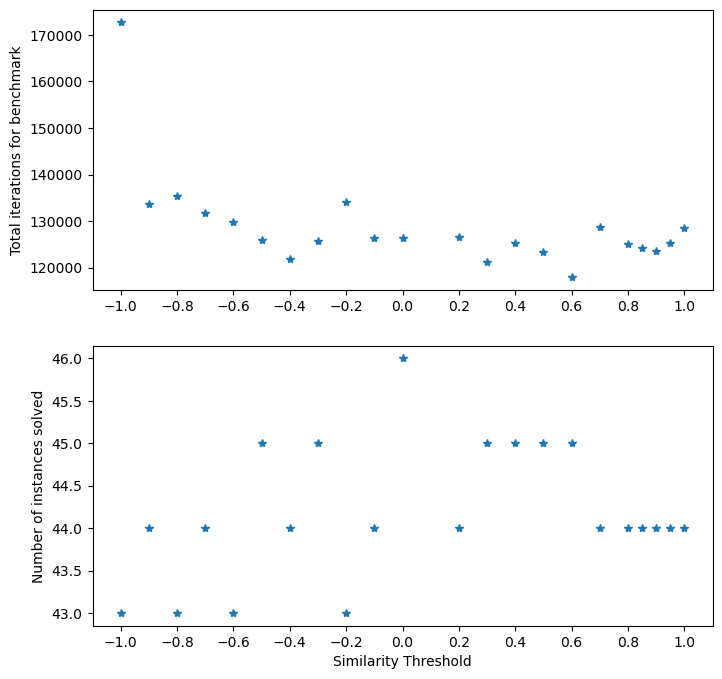

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(similarity_threshold_list, total_iterations_list, "*")
plt.ylabel("Total iterations for benchmark")
plt.xticks(np.arange(-1,1.1,0.2))

plt.subplot(2, 1, 2)
plt.plot(similarity_threshold_list, solved_instances_list, "*")
plt.xlabel("Similarity Threshold")
plt.xticks(np.arange(-1,1.1,0.2))
plt.ylabel("Number of instances solved")


# Largest inertia winners:
- L1_sixm250obs

# Largest inertia losers: (maybe tune a little bit on these)
- buildingenenergy
- degme